# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [120]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [121]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = (citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name).capitalize()
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)
# list(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [122]:
# Define variables and create empty lists

record = 0
set = 1

weather_check_df = pd.DataFrame({'City Name': cities})

weather_check_df['Country'] = ""
weather_check_df['Latitude'] = ""
weather_check_df['Longitude'] = ""
weather_check_df['Humidity (%)'] = ""
weather_check_df['Temperature (F)'] = ""
weather_check_df['Max Temp (F)'] = ""
weather_check_df['Cloudiness (%)'] = ""
weather_check_df['Wind Speed (mph)'] = ""
weather_check_df['Date'] = ""


weather_check_df.head()

,City Name,Country,Latitude,Longitude,Humidity (%),Temperature (F),Max Temp (F),Cloudiness (%),Wind Speed (mph),Date
0,Ushuaia,,,,,,,,,
1,Vila franca do campo,,,,,,,,,
2,Ilulissat,,,,,,,,,
3,Thompson,,,,,,,,,
4,Mar del plata,,,,,,,,,


In [123]:
# URL for GET requests to retrieve weather data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key

print(f'Beginning Data Retrieval')
print("-------------------------")
    
# use iterrows to iterate through pandas dataframe (there's a better way to iterate through rows than this)
for index, row in weather_check_df.iterrows():

    # get City Name from df
    city_name = row['City Name']

    # Assemble query url and make API request and jsonify it
    query_url = base_url + "&q=" + city_name
    response = requests.get(query_url).json()
    

    try:
        # Set print log
        
        print(f"Processing Record {record} of Set {set} | {city_name}.")
#         print(query_url)
        
        weather_check_df.loc[index, 'Country'] = response["sys"]["country"]
        weather_check_df.loc[index, 'Latitude'] = response["coord"]["lat"]
        weather_check_df.loc[index, 'Longitude'] = response["coord"]["lon"]
        weather_check_df.loc[index, 'Humidity (%)'] = response["main"]["humidity"]
        weather_check_df.loc[index, 'Temperature (F)'] = (response["main"]["temp"] * 1.8) + 32
        weather_check_df.loc[index, 'Max Temp (F)'] = (response["main"]["temp_max"] * 1.8) + 32
        weather_check_df.loc[index, 'Cloudiness (%)'] = response["clouds"]["all"]
        weather_check_df.loc[index, 'Wind Speed (mph)'] = response["wind"]["speed"]
    
    except:
        print(f"{city_name} not found. Skipping to next city...")
        
    record += 1
    if record == 50:
        record = 0
        set += 1
    
print(f'Data Retrieval Complete')
print("-------------------------")

Beginning Data Retrieval
-------------------------
Processing Record 0 of Set 1 | Ushuaia.
Processing Record 1 of Set 1 | Vila franca do campo.
Processing Record 2 of Set 1 | Ilulissat.
Processing Record 3 of Set 1 | Thompson.
Processing Record 4 of Set 1 | Mar del plata.
Processing Record 5 of Set 1 | Deputatskiy.
Processing Record 6 of Set 1 | Luis correia.
Processing Record 7 of Set 1 | Busselton.
Processing Record 8 of Set 1 | Avarua.
Processing Record 9 of Set 1 | Bluff.
Processing Record 10 of Set 1 | Cape town.
Processing Record 11 of Set 1 | Belsand.
Processing Record 12 of Set 1 | Mys shmidta.
Mys shmidta not found. Skipping to next city...
Processing Record 13 of Set 1 | Port alfred.
Processing Record 14 of Set 1 | Katsuura.
Processing Record 15 of Set 1 | Kingaroy.
Processing Record 16 of Set 1 | Rikitea.
Processing Record 17 of Set 1 | Caravelas.
Processing Record 18 of Set 1 | Rio gallegos.
Processing Record 19 of Set 1 | Pryazha.
Processing Record 20 of Set 1 | Gamba.
Pro

Processing Record 25 of Set 4 | Laiagam.
Laiagam not found. Skipping to next city...
Processing Record 26 of Set 4 | Portland.
Processing Record 27 of Set 4 | Kodiak.
Processing Record 28 of Set 4 | Gujranwala.
Processing Record 29 of Set 4 | Beringovskiy.
Processing Record 30 of Set 4 | Petropavlovsk-kamchatskiy.
Processing Record 31 of Set 4 | Muros.
Processing Record 32 of Set 4 | Faya.
Processing Record 33 of Set 4 | Lasa.
Processing Record 34 of Set 4 | Puerto escondido.
Processing Record 35 of Set 4 | Chawinda.
Processing Record 36 of Set 4 | Redcliffe.
Processing Record 37 of Set 4 | Santa fe do sul.
Processing Record 38 of Set 4 | Lorengau.
Processing Record 39 of Set 4 | Awbari.
Processing Record 40 of Set 4 | Kachikau.
Kachikau not found. Skipping to next city...
Processing Record 41 of Set 4 | Abeche.
Processing Record 42 of Set 4 | Chisinau.
Processing Record 43 of Set 4 | Lodja.
Processing Record 44 of Set 4 | Bonthe.
Processing Record 45 of Set 4 | Grand falls.
Processing

Processing Record 6 of Set 8 | Arman.
Processing Record 7 of Set 8 | Palabuhanratu.
Palabuhanratu not found. Skipping to next city...
Processing Record 8 of Set 8 | Los llanos de aridane.
Processing Record 9 of Set 8 | Muravlenko.
Processing Record 10 of Set 8 | San quintin.
Processing Record 11 of Set 8 | El limon.
Processing Record 12 of Set 8 | Belfast.
Processing Record 13 of Set 8 | Yarmouth.
Processing Record 14 of Set 8 | Saskylakh.
Processing Record 15 of Set 8 | Saint-augustin.
Processing Record 16 of Set 8 | Ouadda.
Processing Record 17 of Set 8 | Havre-saint-pierre.
Processing Record 18 of Set 8 | Litoral del san juan.
Litoral del san juan not found. Skipping to next city...
Processing Record 19 of Set 8 | Boyolangu.
Processing Record 20 of Set 8 | Monrovia.
Processing Record 21 of Set 8 | Fairbanks.
Processing Record 22 of Set 8 | Bambous virieux.
Processing Record 23 of Set 8 | Sao jose.
Processing Record 24 of Set 8 | Anloga.
Processing Record 25 of Set 8 | Bereda.
Proces

Processing Record 31 of Set 11 | Khandyga.
Processing Record 32 of Set 11 | Bani walid.
Processing Record 33 of Set 11 | Luena.
Processing Record 34 of Set 11 | Kontagora.
Processing Record 35 of Set 11 | Hay river.
Processing Record 36 of Set 11 | Suhbaatar.
Processing Record 37 of Set 11 | Mounana.
Processing Record 38 of Set 11 | Hamilton.
Processing Record 39 of Set 11 | Ulcinj.
Processing Record 40 of Set 11 | Warqla.
Warqla not found. Skipping to next city...
Processing Record 41 of Set 11 | Tongliao.
Processing Record 42 of Set 11 | Warman.
Processing Record 43 of Set 11 | Bose.
Processing Record 44 of Set 11 | Aklavik.
Processing Record 45 of Set 11 | Show low.
Processing Record 46 of Set 11 | Perigueux.
Processing Record 47 of Set 11 | Talara.
Processing Record 48 of Set 11 | Lysva.
Processing Record 49 of Set 11 | Cap malheureux.
Processing Record 0 of Set 12 | Los rastrojos.
Processing Record 1 of Set 12 | Pailon.
Processing Record 2 of Set 12 | Timmins.
Processing Record 3 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [127]:
# Check file and clean null values
# weather_check_df = weather_check_df.drop('Date',1)
weather_check_df.head(20)

,City Name,Country,Latitude,Longitude,Humidity (%),Temperature (F),Max Temp (F),Cloudiness (%),Wind Speed (mph)
0,Ushuaia,AR,-54.8,-68.3,61,44.258,53.222,75,16.46
1,Vila franca do campo,PT,37.7167,-25.4333,63,70.214,70.214,71,1.51
2,Ilulissat,GL,69.2167,-51.1,80,28.418,28.418,75,2.06
3,Thompson,CA,55.7435,-97.8558,86,28.562,28.562,90,3.6
4,Mar del plata,AR,-38.0023,-57.5575,91,61.88,77.018,0,7.15
5,Deputatskiy,RU,69.3,139.9,99,-0.616,-0.616,100,1.43
6,Luis correia,BR,-2.8792,-41.6669,66,91.4,91.4,40,6.69
7,Busselton,AU,-33.65,115.3333,86,51.044,52.088,44,2.71
8,Avarua,CK,-21.2078,-159.775,73,71.654,71.654,75,4.12
9,Bluff,NZ,-46.6,168.3333,86,40.946,40.946,6,2.59


In [138]:
# Convert data strings to float
pd.to_numeric(weather_check_df['Latitude']).astype(float)
pd.to_numeric(weather_check_df['Longitude']).astype(float)
pd.to_numeric(weather_check_df['Humidity (%)']).astype(float)
pd.to_numeric(weather_check_df['Temperature (F)']).astype(float)
pd.to_numeric(weather_check_df['Max Temp (F)']).astype(float)
pd.to_numeric(weather_check_df['Cloudiness (%)']).astype(float)
pd.to_numeric(weather_check_df['Wind Speed (mph)']).astype(float)

weather_check_df.head()

,City Name,Country,Latitude,Longitude,Humidity (%),Temperature (F),Max Temp (F),Cloudiness (%),Wind Speed (mph)
0,Ushuaia,AR,-54.8,-68.3,61,44.258,53.222,75,16.46
1,Vila franca do campo,PT,37.7167,-25.4333,63,70.214,70.214,71,1.51
2,Ilulissat,GL,69.2167,-51.1,80,28.418,28.418,75,2.06
3,Thompson,CA,55.7435,-97.8558,86,28.562,28.562,90,3.6
4,Mar del plata,AR,-38.0023,-57.5575,91,61.88,77.018,0,7.15


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [141]:
# Convert to CSV file
# save the dataframe as csv file
weather_check_df.to_csv("output_data/weather.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

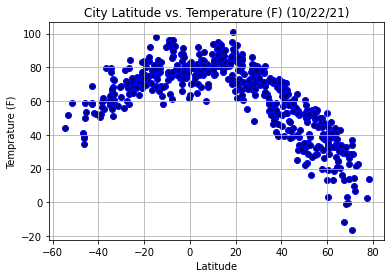

The plot indicates that latitude is inversely related to temperature. As the latitude increases, the temperature decreases.


<Figure size 432x288 with 0 Axes>

In [165]:
plt.scatter(pd.to_numeric(weather_check_df["Latitude"]).astype(float), pd.to_numeric(weather_check_df["Temperature (F)"]).astype(float), marker = "o", facecolor = "navy", edgecolor="blue")
date = time.strftime("(%m/%d/%y)")
plt.title(f"City Latitude vs. Temperature (F) {date}")
plt.xlabel("Latitude")
plt.ylabel("Temprature (F)")
plt.grid()
plt.show()
plt.savefig("output_data/images/LatitudevsTemperature.png")

# Analysis
print(f"The plot indicates that latitude is inversely related to temperature. As the latitude increases, the temperature decreases.")


## Latitude vs. Humidity Plot

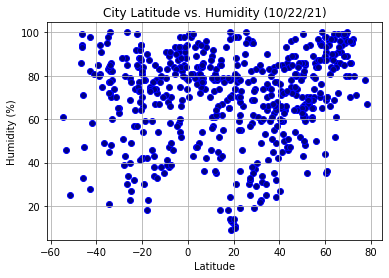

The plot indicates that there is no direct correlation to latitude and humidity. There is a pattern of higher humidity percentages as latitude moves above 60 degrees north.


<Figure size 432x288 with 0 Axes>

In [166]:
plt.scatter(pd.to_numeric(weather_check_df["Latitude"]).astype(float), pd.to_numeric(weather_check_df['Humidity (%)']).astype(float), marker = "o", facecolor = "navy", edgecolor="blue")
date = time.strftime("(%m/%d/%y)")
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
plt.savefig("output_data/images/LatitudevsHumidity.png")

# Analysis
print(f"The plot indicates that there is no direct correlation to latitude and humidity. There is a pattern of higher humidity percentages as latitude moves above 60 degrees north.")
      

## Latitude vs. Cloudiness Plot

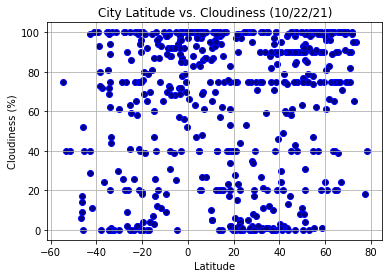

The plot indicates that there is no correlation between latitude and cloudiness.


<Figure size 432x288 with 0 Axes>

In [167]:
plt.scatter(pd.to_numeric(weather_check_df["Latitude"]).astype(float), pd.to_numeric(weather_check_df['Cloudiness (%)']).astype(float), marker = "o", facecolor = "navy", edgecolor="blue")
date = time.strftime("(%m/%d/%y)")
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
plt.savefig("output_data/images/LatitudevsCloudiness.png")

# Analysis
print(f"The plot indicates that there is no correlation between latitude and cloudiness.")

## Latitude vs. Wind Speed Plot

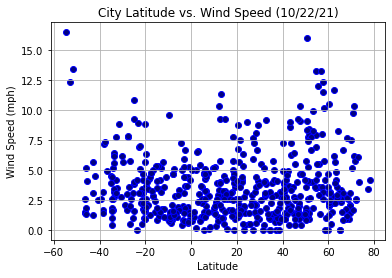

The plot indicates that there is no correlation between latitude and wind speed.


<Figure size 432x288 with 0 Axes>

In [168]:
plt.scatter(pd.to_numeric(weather_check_df["Latitude"]).astype(float), pd.to_numeric(weather_check_df['Wind Speed (mph)']).astype(float), marker = "o", facecolor = "navy", edgecolor="blue")
date = time.strftime("(%m/%d/%y)")
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
plt.savefig("output_data/images/LatitudevsWindSpeed.png")

# Analysis
print(f"The plot indicates that there is no correlation between latitude and wind speed.")


## Linear Regression

In [146]:
# Identify Northern and Southern Hemisphere and make DataFrames for each
weather_check_north_df = weather_check_df.loc[pd.to_numeric(weather_check_df["Latitude"]).astype(float) >= 0]
weather_check_south_df = weather_check_df.loc[pd.to_numeric(weather_check_df["Latitude"]).astype(float) < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

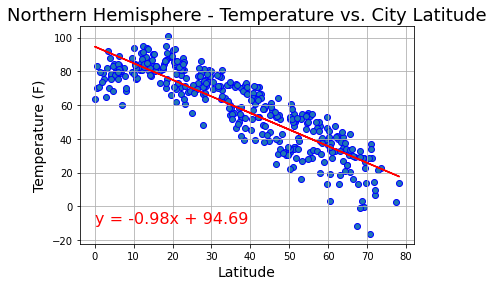

The r squared is: -0.8725575720445296. This is generally considered to mean that there is a negative correlation between temperature and latitude in the Northern Hemisphere. As latitude increases, temperature decreases.


<Figure size 432x288 with 0 Axes>

In [170]:
# Create Regression line
x_axis = pd.to_numeric(weather_check_north_df["Latitude"]).astype(float)
y_axis = pd.to_numeric(weather_check_north_df['Temperature (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_axis,y_axis,marker='o',edgecolors='blue')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, xy=(0,-10),fontsize=16,color='red')
plt.grid()
plt.title('Northern Hemisphere - Temperature vs. City Latitude',size=18)
plt.xlabel('Latitude',size=14)
plt.ylabel('Temperature (F)',size=14)
plt.show()
plt.savefig("output_data/images/Northern_Hem_temperature.png")

#Analysis
print(f"The r squared is: {rvalue}. This is generally considered to mean that there is a negative correlation between temperature and latitude in the Northern Hemisphere. As latitude increases, temperature decreases.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

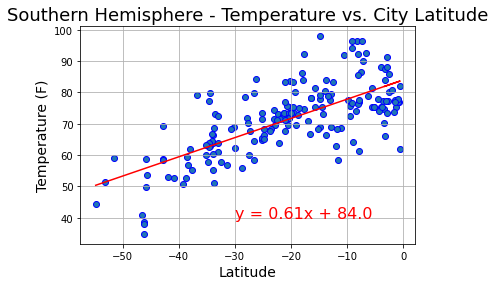

The r squared is: 0.7099506542420461. This is generally considered to mean that there is a correlation between temperature and latitude in the Southern Hemisphere. As latitude decreases, temperature increases.


<Figure size 432x288 with 0 Axes>

In [171]:
# Create Regression line
x_axis = pd.to_numeric(weather_check_south_df["Latitude"]).astype(float)
y_axis = pd.to_numeric(weather_check_south_df['Temperature (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_axis,y_axis,marker='o',edgecolors='blue')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, xy=(-30,40),fontsize=16,color='red')
plt.grid()
plt.title('Southern Hemisphere - Temperature vs. City Latitude',size=18)
plt.xlabel('Latitude',size=14)
plt.ylabel('Temperature (F)',size=14)
plt.show()
plt.savefig("output_data/images/Southern_Hem_temperature.png")

#Analysis
print(f"The r squared is: {rvalue}. This is generally considered to mean that there is a correlation between temperature and latitude in the Southern Hemisphere. As latitude decreases, temperature increases.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

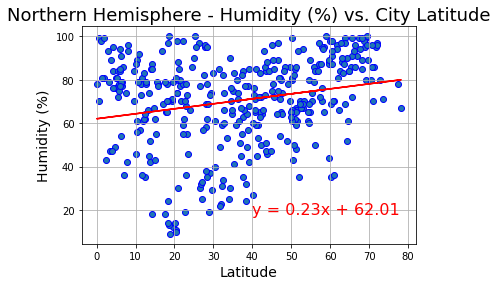

The r squared is: 0.2260314202542532. This is generally considered to mean that there is a weak or low correlation between latitude and humidity in the Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [172]:
# Create Regression line
x_axis = pd.to_numeric(weather_check_north_df["Latitude"]).astype(float)
y_axis = pd.to_numeric(weather_check_north_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_axis,y_axis,marker='o',edgecolors='blue')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, xy=(40,18),fontsize=16,color='red')
plt.grid()
plt.title('Northern Hemisphere - Humidity (%) vs. City Latitude',size=18)
plt.xlabel('Latitude',size=14)
plt.ylabel('Humidity (%)',size=14)
plt.show()
plt.savefig("output_data/images/Northern_Hem_Humidity.png")

#Analysis
print(f"The r squared is: {rvalue}. This is generally considered to mean that there is a weak or low correlation between latitude and humidity in the Northern Hemisphere.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

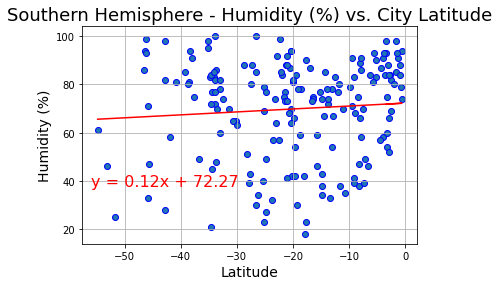

The r squared is: 0.07947372101903259. This is generally considered to mean that there is a weak or low correlation between latitude and humidity in the Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [173]:
# Create Regression line
x_axis = pd.to_numeric(weather_check_south_df["Latitude"]).astype(float)
y_axis = pd.to_numeric(weather_check_south_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_axis,y_axis,marker='o',edgecolors='blue')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, xy=(-56,38),fontsize=16,color='red')
plt.grid()
plt.title('Southern Hemisphere - Humidity (%) vs. City Latitude',size=18)
plt.xlabel('Latitude',size=14)
plt.ylabel('Humidity (%)',size=14)
plt.show()
plt.savefig("output_data/images/Southern_Hem_Humidity.png")

#Analysis
print(f"The r squared is: {rvalue}. This is generally considered to mean that there is a weak or low correlation between latitude and humidity in the Southern Hemisphere.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

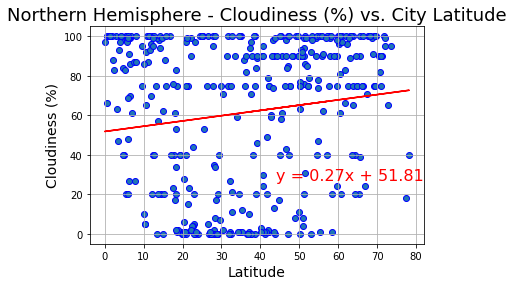

The r squared is: 0.14340680498344596. This is generally considered to mean that there is a weak or low correlation between latitude and cloudiness in the Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [174]:
# Create Regression line
x_axis = pd.to_numeric(weather_check_north_df["Latitude"]).astype(float)
y_axis = pd.to_numeric(weather_check_north_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_axis,y_axis,marker='o',edgecolors='blue')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, xy=(44,27),fontsize=16,color='red')
plt.grid()
plt.title('Northern Hemisphere - Cloudiness (%) vs. City Latitude',size=18)
plt.xlabel('Latitude',size=14)
plt.ylabel('Cloudiness (%)',size=14)
plt.show()
plt.savefig("output_data/images/Northern_Hem_Cloudiness.png")

#Analysis
print(f"The r squared is: {rvalue}. This is generally considered to mean that there is a weak or low correlation between latitude and cloudiness in the Northern Hemisphere.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

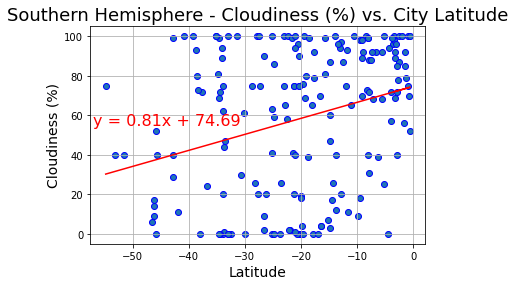

The r squared is: 0.2927096330130208. This is generally considered to mean that there is a weak or low correlation between latitude and cloudiness in the Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [175]:
# Create Regression line
x_axis = pd.to_numeric(weather_check_south_df["Latitude"]).astype(float)
y_axis = pd.to_numeric(weather_check_south_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_axis,y_axis,marker='o',edgecolors='blue')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, xy=(-57,55),fontsize=16,color='red')
plt.grid()
plt.title('Southern Hemisphere - Cloudiness (%) vs. City Latitude',size=18)
plt.xlabel('Latitude',size=14)
plt.ylabel('Cloudiness (%)',size=14)
plt.show()
plt.savefig("output_data/images/Southern_Hem_Cloudiness.png")

#Analysis
print(f"The r squared is: {rvalue}. This is generally considered to mean that there is a weak or low correlation between latitude and cloudiness in the Southern Hemisphere.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

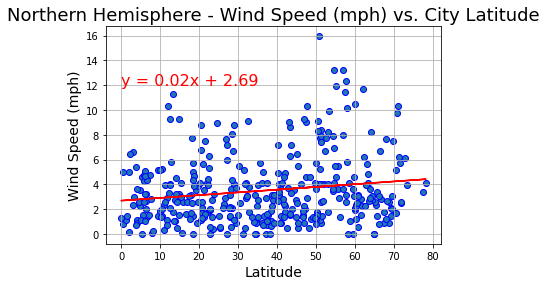

The r squared is: 0.16360031834011374. This is generally considered to mean that there is a weak or low correlation between latitude and wind speed in the Northern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [176]:
# Create Regression line
x_axis = pd.to_numeric(weather_check_north_df["Latitude"]).astype(float)
y_axis = pd.to_numeric(weather_check_north_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_axis,y_axis,marker='o',edgecolors='blue')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, xy=(0,12),fontsize=16,color='red')
plt.grid()
plt.title('Northern Hemisphere - Wind Speed (mph) vs. City Latitude',size=18)
plt.xlabel('Latitude',size=14)
plt.ylabel('Wind Speed (mph)',size=14)
plt.show()
plt.savefig("output_data/images/Northern_Hem_Wind.png")

#Analysis
print(f"The r squared is: {rvalue}. This is generally considered to mean that there is a weak or low correlation between latitude and wind speed in the Northern Hemisphere.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

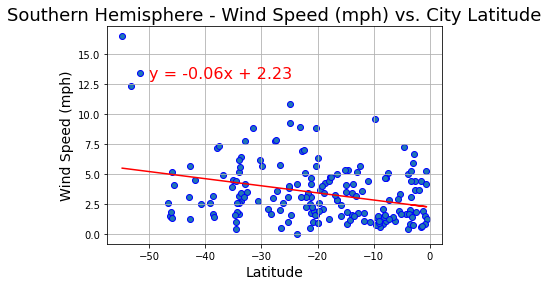

The r squared is: -0.30634901275593274. This is generally considered to mean that there is a weak or low correlation between latitude and wind speed in the Southern Hemisphere.


<Figure size 432x288 with 0 Axes>

In [177]:
# Create Regression line
x_axis = pd.to_numeric(weather_check_south_df["Latitude"]).astype(float)
y_axis = pd.to_numeric(weather_check_south_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#generate plot
lat_temp_reg_n = plt.scatter(x_axis,y_axis,marker='o',edgecolors='blue')
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq, xy=(-50,13),fontsize=16,color='red')
plt.grid()
plt.title('Southern Hemisphere - Wind Speed (mph) vs. City Latitude',size=18)
plt.xlabel('Latitude',size=14)
plt.ylabel('Wind Speed (mph)',size=14)
plt.show()
plt.savefig("output_data/images/Southern_Hem_Wind.png")

#Analysis
print(f"The r squared is: {rvalue}. This is generally considered to mean that there is a weak or low correlation between latitude and wind speed in the Southern Hemisphere.")